<a href="https://colab.research.google.com/github/ychoi-kr/LLM-API/blob/main/openai/OCR_with_GPT_4o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.3/320.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
import os

os.environ["OPENAI_API_KEY"] = api_key = userdata.get('OPENAI_API_KEY')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from openai import OpenAI

client = OpenAI()

In [5]:
image_path = "/content/drive/MyDrive/llm-api-prog/data/notice.jpeg"

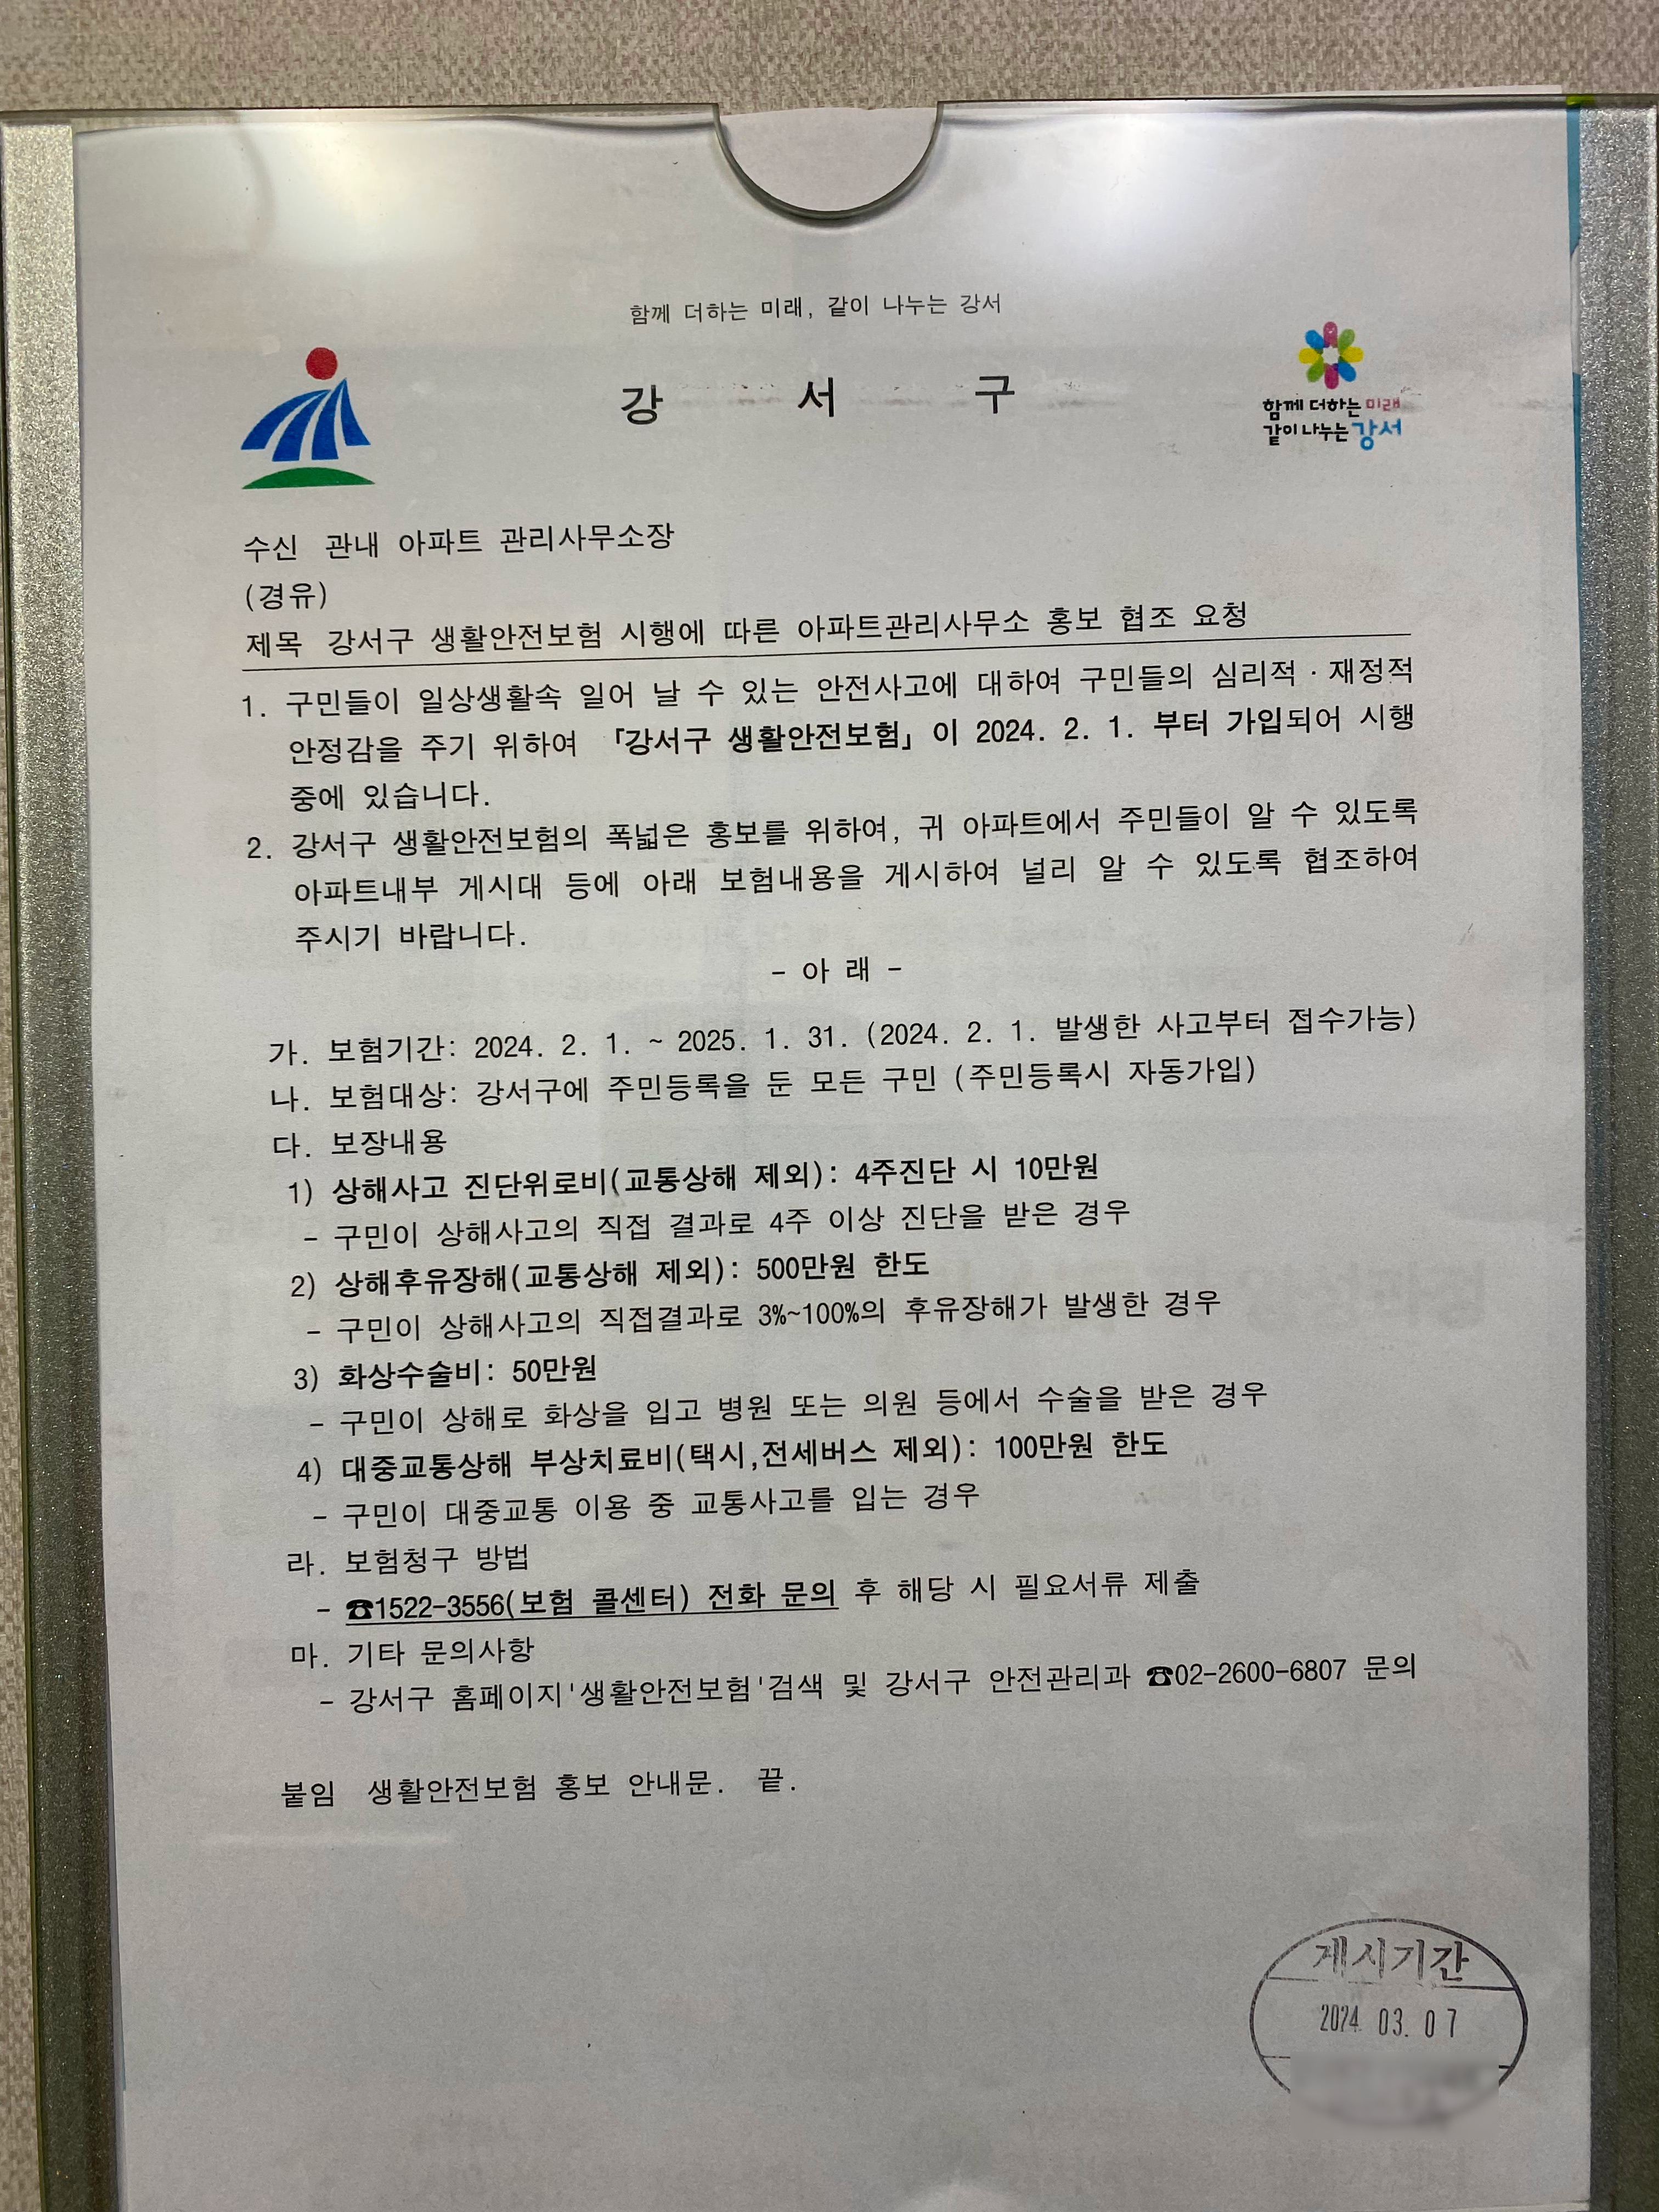

In [6]:
# 이미지를 노트북에 표시

from IPython.display import Image
Image(filename=image_path)


In [7]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [8]:
import base64

base64_image = encode_image(image_path)

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}


In [9]:
payload = {
    "model": "gpt-4o",
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "사진 속 문서에 무엇이라고 쓰여 있나요?"
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}"
                    }
                }
            ]
        }
    ],
    "max_tokens": 300
}

In [10]:
import requests

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

In [11]:
print(response.json())

{'id': 'chatcmpl-9OdVtIJGwrkMgvhmJaHpsaLxvEWJt', 'object': 'chat.completion', 'created': 1715658789, 'model': 'gpt-4o-2024-05-13', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '이 문서에는 다음과 같은 내용이 적혀 있습니다:\n\n```\n함께 더하는 미래, 같이 나누는 강서\n\n강 서 구\n\n수신 관내 아파트 관리사무소장\n(경유)\n제목 강서구 생활안전보험 시행에 따른 아파트관리사무소 홍보 협조 요청\n\n1. 구민들이 일상생활속 일어 날 수 있는 안전사고에 대하여 구민들의 심리적ㆍ재정적\n   안정감을 주기 위하여 [강서구 생활안전보험]이 2024. 2. 1. 부터 가입되어 시행\n   중에 있습니다.\n2. 강서구 생활안전보험의 폭넓은 홍보를 위하여, 귀 아파트에서 주민들이 알 수 있도록\n   아파트내부 게시대 등에 아래 보험내용을 게시하여 널리 알 수 있도록 협조하여\n   주시기 바랍니다.\n\n- 아 래 -\n가. 보장기간: 2024. 2. 1. ~ 2025. 1. 31. (2024. 2.1. 발생한 사고부터 접수가능)\n나. 보장대상: 강서구 구민(등록된 주민등록을 둔 모든 구민(등록외국인 자동가입)\n다. 보장내용\n1) 상해사고 진단위로비(교'}, 'logprobs': None, 'finish_reason': 'length'}], 'usage': {'prompt_tokens': 784, 'completion_tokens': 300, 'total_tokens': 1084}, 'system_fingerprint': 'fp_927397958d'}


In [12]:
print(response.json()["choices"][0]["message"]["content"])

이 문서에는 다음과 같은 내용이 적혀 있습니다:

```
함께 더하는 미래, 같이 나누는 강서

강 서 구

수신 관내 아파트 관리사무소장
(경유)
제목 강서구 생활안전보험 시행에 따른 아파트관리사무소 홍보 협조 요청

1. 구민들이 일상생활속 일어 날 수 있는 안전사고에 대하여 구민들의 심리적ㆍ재정적
   안정감을 주기 위하여 [강서구 생활안전보험]이 2024. 2. 1. 부터 가입되어 시행
   중에 있습니다.
2. 강서구 생활안전보험의 폭넓은 홍보를 위하여, 귀 아파트에서 주민들이 알 수 있도록
   아파트내부 게시대 등에 아래 보험내용을 게시하여 널리 알 수 있도록 협조하여
   주시기 바랍니다.

- 아 래 -
가. 보장기간: 2024. 2. 1. ~ 2025. 1. 31. (2024. 2.1. 발생한 사고부터 접수가능)
나. 보장대상: 강서구 구민(등록된 주민등록을 둔 모든 구민(등록외국인 자동가입)
다. 보장내용
1) 상해사고 진단위로비(교
